In [28]:
import requests
import json
from xml.etree import ElementTree

url = "https://opendata.cwa.gov.tw/api/v1/rest/datastore/C-B0027-001"
query = {"Authorization": "CWA-C03B97B0-3E9B-478D-8CCE-3FC2DE4F2FC0", 
           "StationID": ["467480"],
           }

response = requests.get(url, params=query)
data = response.json()

with open('green.json', 'w') as f:
    json.dump(data, f)







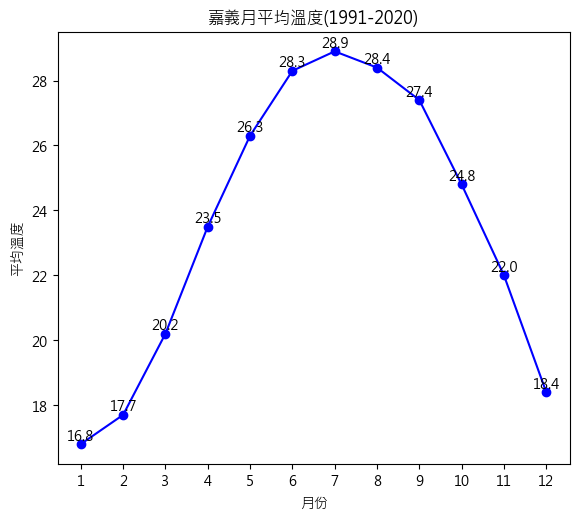

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['font.sans-serif'] = ["Microsoft JhengHei"]

# Extract temperature data
temperature_data = data["records"]["data"]["surfaceObs"]["location"][0]["stationObsStatistics"]["AirTemperature"]["monthly"]

# Create DataFrames for temperature and air pressure
temperature_df = pd.DataFrame(temperature_data).astype(float)

# Display DataFrames

# Plot the data
plt.plot(temperature_df['Month'], temperature_df['Mean'], marker='o', linestyle='-', color='blue')

# Annotate each point with its y value
for i, mean in enumerate(temperature_df['Mean']):
    plt.text(temperature_df['Month'][i], mean, str(mean), ha='center', va='bottom')

# Set the title and labels
title='嘉義月平均溫度(1991-2020)'
plt.title(title)
plt.xlabel('月份')
plt.ylabel('平均溫度')

# Set the x-axis ticks to show every other month
plt.xticks(temperature_df['Month'][::])

plt.subplots_adjust(left=0.1, right=0.9, top=1, bottom=0.1)

# Show the plot
plt.savefig(title + '.png', bbox_inches='tight')
plt.show()







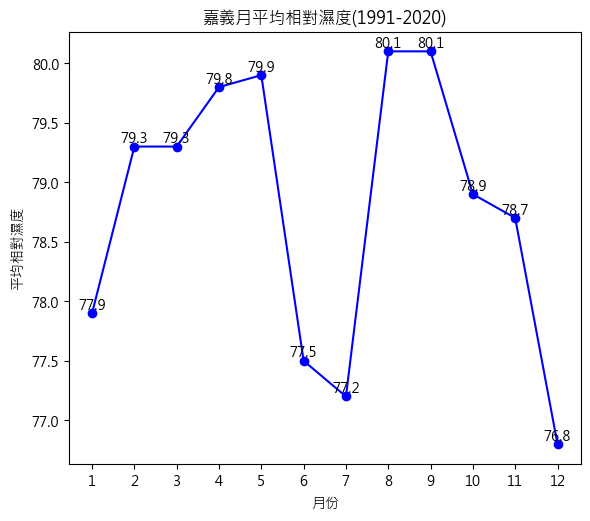

In [30]:
# Extract RelativeHumidity data
humidity_data = data["records"]["data"]["surfaceObs"]["location"][0]["stationObsStatistics"]["RelativeHumidity"]["monthly"]

# Create DataFrame for RelativeHumidity
humidity_df = pd.DataFrame(humidity_data).astype(float)

# Plot the data
plt.plot(humidity_df['Month'], humidity_df['Mean'], marker='o', linestyle='-', color='blue')

# Annotate each point with its y value
for i, mean in enumerate(humidity_df['Mean']):
    plt.text(humidity_df['Month'][i], mean, str(mean), ha='center', va='bottom')

# Set the title and labels
title='嘉義月平均相對濕度(1991-2020)'
plt.title(title)
plt.xlabel('月份')
plt.ylabel('平均相對濕度')

# Set the x-axis ticks to show every other month
plt.xticks(humidity_df['Month'][::])

plt.subplots_adjust(left=0.1, right=0.9, top=1, bottom=0.1)

# Show the plot
plt.savefig(title + '.png', bbox_inches='tight')
plt.show()

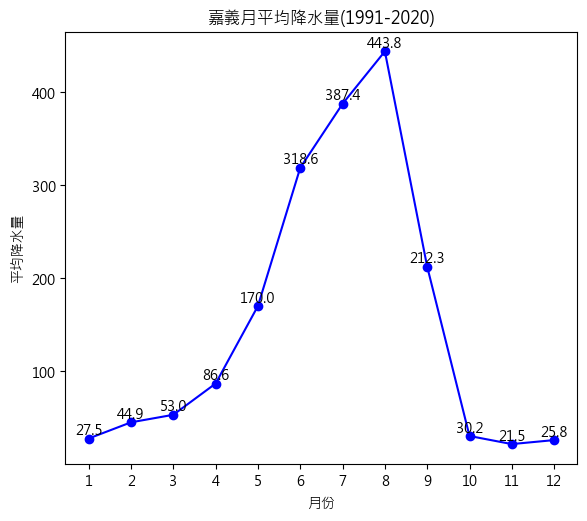

In [31]:
# Extract Precipitation data
precipitation_data = data["records"]["data"]["surfaceObs"]["location"][0]["stationObsStatistics"]["Precipitation"]["monthly"]


# Create DataFrame for Precipitation
precipitation_df = pd.DataFrame(precipitation_data).astype(float)
precipitation_df["Accumulation"] = precipitation_df["Accumulation"].astype(float)
precipitation_df["GE01Days"] = precipitation_df["GE01Days"].astype(float)

# Set the title and labels
title = '嘉義月平均降水量(1991-2020)'
plt.title(title)
plt.xlabel('月份')
plt.ylabel('平均降水量')

# Set the x-axis ticks to show every other month
plt.xticks(precipitation_df['Month'][::])

plt.subplots_adjust(left=0.1, right=0.9, top=1, bottom=0.1)

# Plot the data
plt.plot(precipitation_df['Month'], precipitation_df['Accumulation'], marker='o', linestyle='-', color='blue')

# Annotate each point with its y value
for i, accumulation in enumerate(precipitation_df['Accumulation']):
    plt.text(precipitation_df['Month'][i], accumulation, str(accumulation), ha='center', va='bottom')

# Show the plot
plt.savefig(title + '.png', bbox_inches='tight')
plt.show()



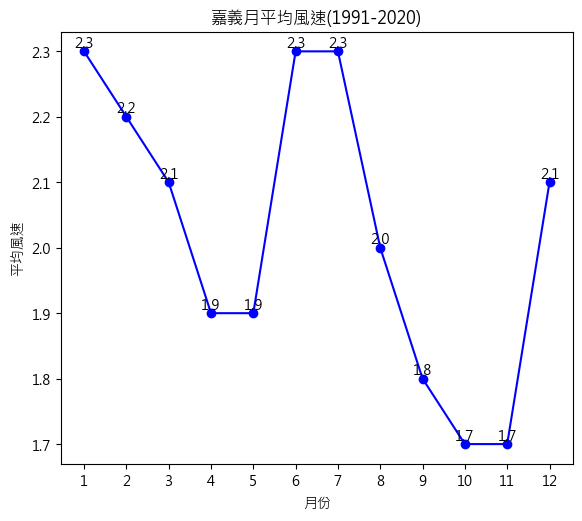

In [32]:
# Extract WindSpeed data
wind_speed_data = data["records"]["data"]["surfaceObs"]["location"][0]["stationObsStatistics"]["WindSpeed"]["monthly"]

# Create DataFrame for WindSpeed
wind_speed_df = pd.DataFrame(wind_speed_data).astype(float)

# Plot the data
plt.plot(wind_speed_df['Month'], wind_speed_df['Mean'], marker='o', linestyle='-', color='blue')

# Annotate each point with its y value
for i, mean in enumerate(wind_speed_df['Mean']):
    plt.text(wind_speed_df['Month'][i], mean, str(mean), ha='center', va='bottom')

# Set the title and labels
title='嘉義月平均風速(1991-2020)'
plt.title(title)
plt.xlabel('月份')
plt.ylabel('平均風速')

# Set the x-axis ticks to show every other month
plt.xticks(wind_speed_df['Month'][::])

plt.subplots_adjust(left=0.1, right=0.9, top=1, bottom=0.1)

# Show the plot
plt.savefig(title + '.png', bbox_inches='tight')
plt.show()

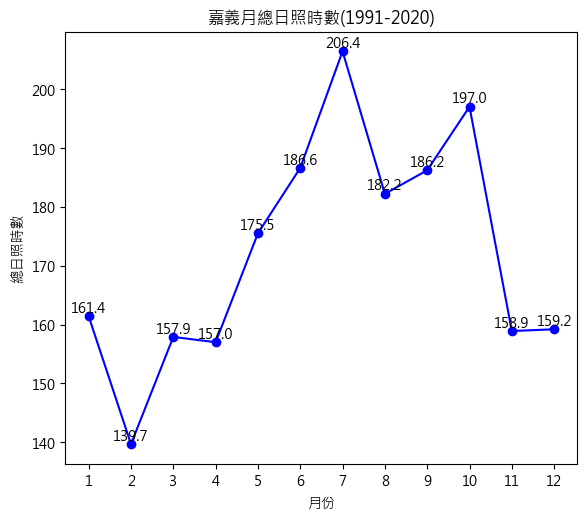

In [33]:
# Extract SunshineDuration data
sunshine_duration_data = data["records"]["data"]["surfaceObs"]["location"][0]["stationObsStatistics"]["SunshineDuration"]["monthly"]

# Create DataFrame for SunshineDuration
sunshine_duration_df = pd.DataFrame(sunshine_duration_data).astype(float)

# Plot the data
plt.plot(sunshine_duration_df['Month'], sunshine_duration_df['Total'], marker='o', linestyle='-', color='blue')

# Annotate each point with its y value
for i, total in enumerate(sunshine_duration_df['Total']):
    plt.text(sunshine_duration_df['Month'][i], total, str(total), ha='center', va='bottom')

# Set the title and labels
title='嘉義月總日照時數(1991-2020)'
plt.title(title)
plt.xlabel('月份')
plt.ylabel('總日照時數')

# Set the x-axis ticks to show every other month
plt.xticks(sunshine_duration_df['Month'][::])

plt.subplots_adjust(left=0.1, right=0.9, top=1, bottom=0.1)

# Show the plot
plt.savefig(title + '.png', bbox_inches='tight')
plt.show()

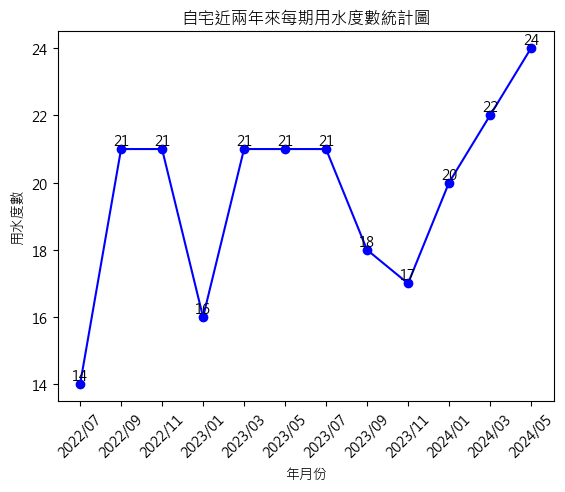

In [34]:
import json
import matplotlib.pyplot as plt

# Read the water.json file
with open('water.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

data = sorted(data, key=lambda x: x['年月'])

# Extract the values for each column
months = [entry['年月'] for entry in data]
usage = [int(entry['用水度數(不含分攤度數)'].replace('度', '')) for entry in data]


# Plot the data
plt.plot(months, usage, marker='o', linestyle='-', color='blue')

# Annotate each point with its y value
for i, u in enumerate(usage):
    plt.text(months[i], u, str(u), ha='center', va='bottom')

# Set the title and labels
title="自宅近兩年來每期用水度數統計圖"
plt.title(title)
plt.xlabel('年月份')
plt.ylabel('用水度數')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Save and show the plot
plt.savefig(title + '.png', bbox_inches='tight')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


{'2022/07': 14, '2022/09': 21, '2022/11': 21, '2023/01': 16, '2023/03': 21, '2023/05': 21, '2023/07': 21, '2023/09': 18, '2023/11': 17, '2024/01': 20, '2024/03': 22, '2024/05': 24}


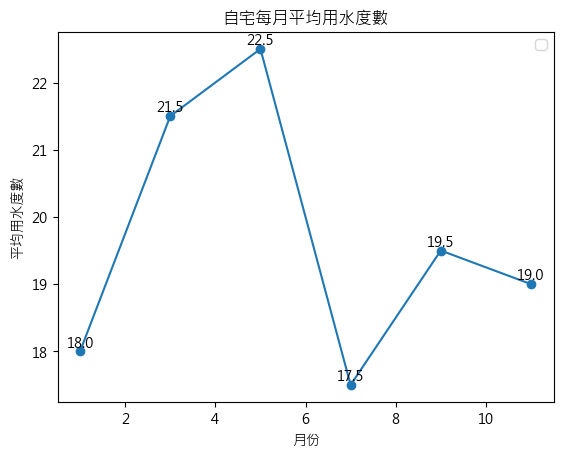

In [35]:
import json
import matplotlib.pyplot as plt
import datetime
from collections import defaultdict

# Read the water.json file
with open('water.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

data = sorted(data, key=lambda x: x['年月'])

# Extract the values for each column
months = [entry['年月'][:7] for entry in data]  # Extract only the year and month
usage = [int(entry['用水度數(不含分攤度數)'].replace('度', '')) for entry in data]


waterData = {
    entry['年月']: int(entry['用水度數(不含分攤度數)'].replace('度', '')) for entry in data
}

print(waterData)

formattedData = {}

for key in waterData:
    year, month = key.split('/')
    formattedKey = f"{int(year)}-{month}"
    date = datetime.datetime.strptime(formattedKey, "%Y-%m")
    formattedData[date] = waterData[key]

from collections import defaultdict

avg_dict = defaultdict(list)

for date, value in formattedData.items():
    month = date.month
    avg_dict[month].append(value)

avg_data = {month: sum(values) / len(values) for month, values in avg_dict.items()}
avg_data = dict(sorted(avg_data.items()))

# Plot the data
plt.plot(avg_data.keys(), avg_data.values(), marker='o', linestyle='-')

# Add the value of y on each dot
for x, y in avg_data.items():
    plt.text(x, y, str(y), ha='center', va='bottom')

# Set the title and labels for the plot
title = '自宅每月平均用水度數'
plt.title(title)
plt.xlabel('月份')
plt.ylabel('平均用水度數')

# Add a legend
plt.legend()

# Show the plot
plt.savefig(title + '.png', bbox_inches='tight')
plt.show()

In [47]:
# 每年每單位淨樓地板面積（m2）平均用水度數
water_per_floor =  sum(usage) / (2 * 240)
print(len(usage))
print(water_per_floor)


12
0.49166666666666664


In [50]:
# 自宅每人每日平均用水公升數
water_per_day = sum(usage) / (365 * 2) * 1000
print(water_per_day / 3)

107.76255707762557


In [51]:
# 西向開出率
print((400 * 300 * 3 + 100 * 100 ) / (400 * 400 * 4))

0.578125
